# Seaborn

* Seaborn is a statistical plotting library built on top of matplotlib.
* It has beautiful default styles, and is designed to work with pandas dataframe objects.

In [1]:
import seaborn as sb

In [2]:
%matplotlib inline

In [3]:
# Create some data
tips = sb.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


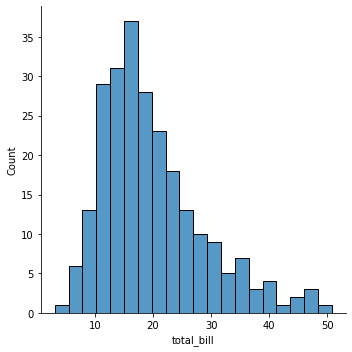

In [15]:
# dis plot -- the distribution of a univariate set of observations
sb.displot(tips['total_bill'],bins=20)

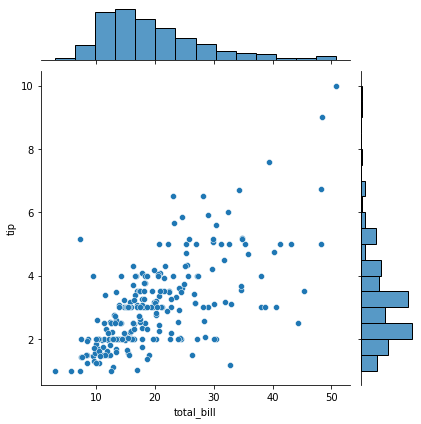

In [18]:
# match two dist plots for bivariate data
sb.jointplot(x='total_bill',y='tip',data=tips)

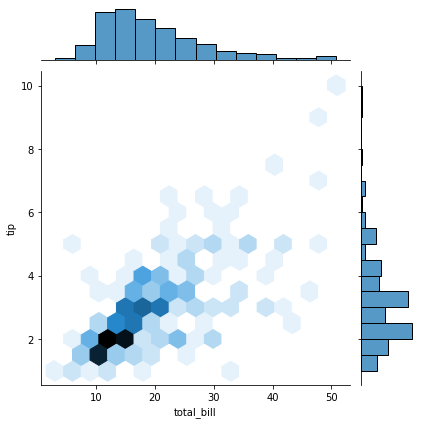

In [19]:
# The default jointplot is scatter, but there are other plot types accessible with kind=parameter
sb.jointplot(x='total_bill',y='tip',data=tips,kind='hex')

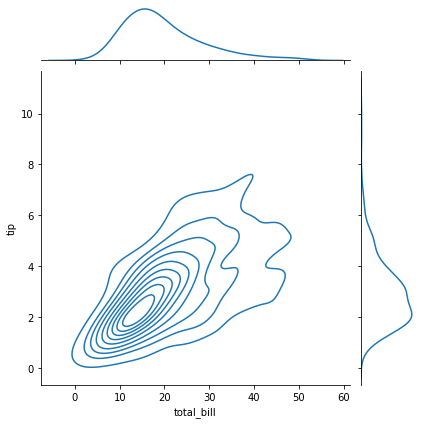

In [20]:
# Here is another example with a kernel density estimation plot
sb.jointplot(x='total_bill',y='tip',data=tips,kind='kde')

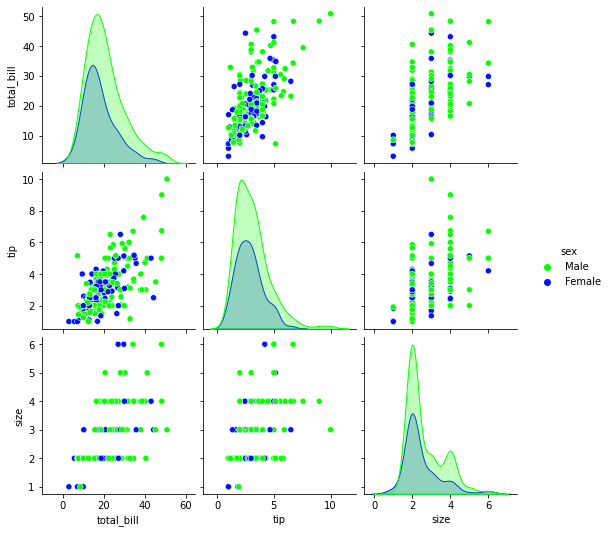

In [27]:
# Let's look at pairplot. It's a joint plot with different combinations of values in the data frame
# This is an easy way to visualize a lot of data at once.
# You can pass a column name in to have seaborn plot different colors by this category.
sb.pairplot(tips,hue='sex',palette='hsv')

<AxesSubplot:xlabel='total_bill'>

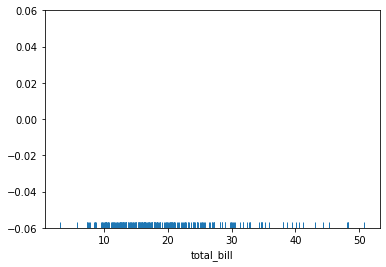

In [28]:
# A rugplot with a kde on top
sb.rugplot(tips['total_bill'])

## kdeplot

kdeplots are [Kernel Density Estimation plots](http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth). These KDE plots replace every single observation with a Gaussian (Normal) distribution centered around that value. For example: 

(0.0, 1.0)

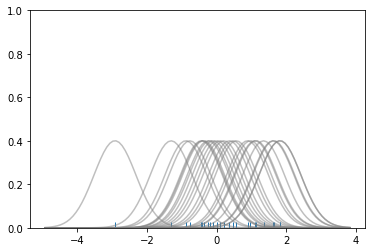

In [30]:
# Don't worry about understanding this code!
# It's just for the diagram below
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

#Create dataset
dataset = np.random.randn(25)

# Create another rugplot
sb.rugplot(dataset);

# Set up the x-axis for the plot
x_min = dataset.min() - 2
x_max = dataset.max() + 2

# 100 equally spaced points from x_min to x_max
x_axis = np.linspace(x_min,x_max,100)

# Set up the bandwidth, for info on this:
url = 'http://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth'

bandwidth = ((4*dataset.std()**5)/(3*len(dataset)))**.2


# Create an empty kernel list
kernel_list = []

# Plot each basis function
for data_point in dataset:
    
    # Create a kernel for each point and append to list
    kernel = stats.norm(data_point,bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    #Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * .4
    plt.plot(x_axis,kernel,color = 'grey',alpha=0.5)

plt.ylim(0,1)

To be honest, I've never made a plot like this before and don't expect to need it!

Text(0.5, 0, 'Total Bill')

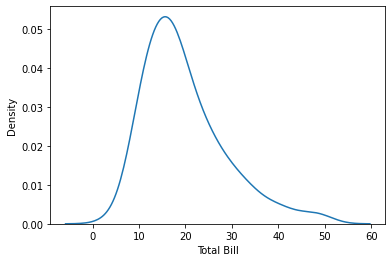

In [33]:
# or a kde plot
fig = sb.kdeplot(tips['total_bill'])
fig.set_xlabel('Total Bill')

## Categorical Plots

Text(0, 0.5, 'std(total bill)')

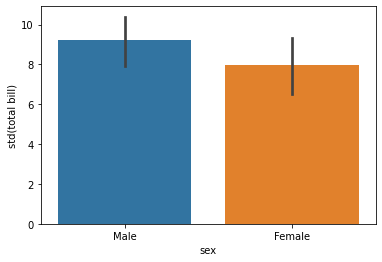

In [44]:
# let's create a bar plot. X is categorical and Y is numeric
# Add an estimator (a function to aggregate data). Note to do this you have to pass in a function!
# You can even create your own function.
import numpy as np
fig = sb.barplot(x='sex',y='total_bill',data=tips,estimator=np.std)
fig.set_ylabel('std(total bill)')

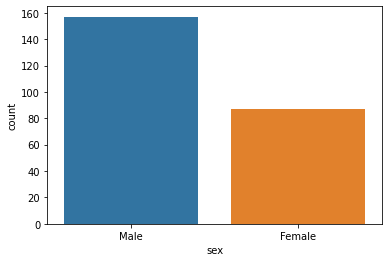

In [43]:
# A count plot is like a barplot except the estimator is counting the number of instances.
fig = sb.countplot(x='sex',data=tips)

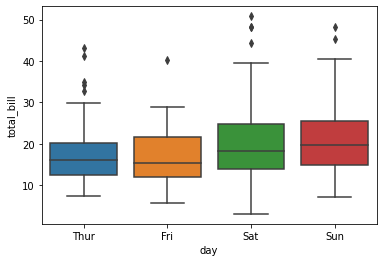

In [47]:
# Box and violin plots
fig = sb.boxplot(x='day',y='total_bill',data=tips)

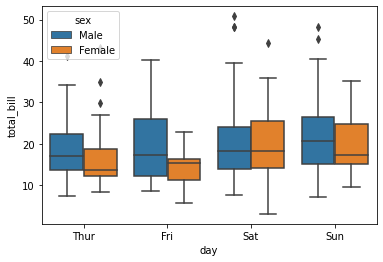

In [57]:
# Add in another category, e.g., smoker (yes/no)
# Box and violin plots
fig = sb.boxplot(x='day',y='total_bill',data=tips,hue='sex')

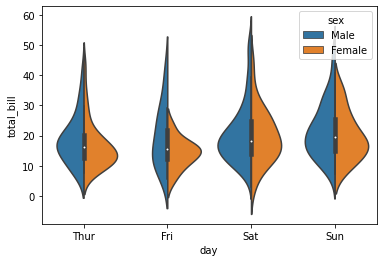

In [61]:
# Violin plots are similar to box plots, except they show the KDE of each distribution.
# The split feature allows you to subdivde by category for a hue.
fig = sb.violinplot(x='day',y='total_bill',data=tips,hue='sex',split='true')

<AxesSubplot:xlabel='day', ylabel='total_bill'>

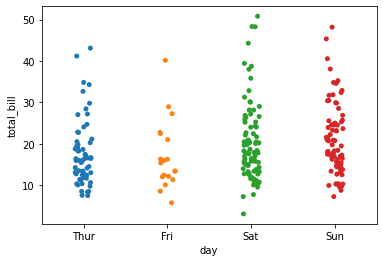

In [63]:
# Strip plot. Pretty similar to boxplot without the boxes :)
sb.stripplot(x='day',y='total_bill',data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

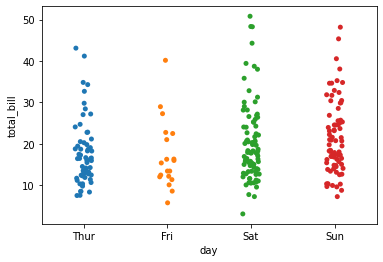

In [64]:
# add some 'jitter' to separate stacked points
sb.stripplot(x='day',y='total_bill',data=tips,jitter=True)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

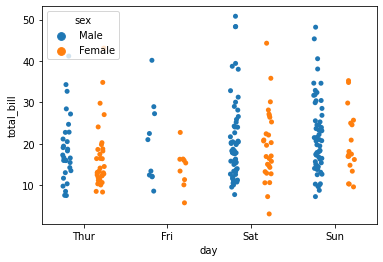

In [68]:
sb.stripplot(x='day',y='total_bill',data=tips,jitter=True,hue='sex',dodge=True) #dodge = split for stripplot

<AxesSubplot:xlabel='day', ylabel='total_bill'>

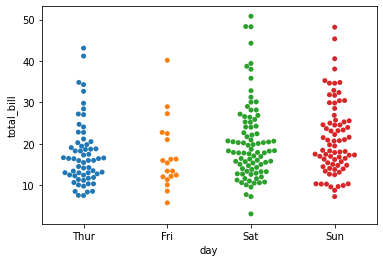

In [70]:
# Swarm plot... similar to strip plot but the points have been arranged to show all the points. 
# It's a little confusing. A KDE plot is much better.
sb.swarmplot(x='day',y='total_bill',data=tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

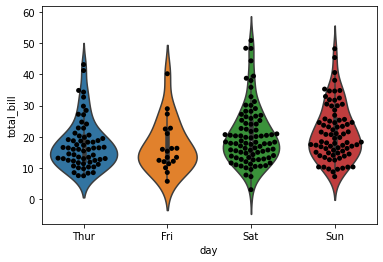

In [72]:
# But, you can overlap swarm and violin plots like so:
# I personally don't like the look of this figure but there you go.
sb.violinplot(x='day',y='total_bill',data=tips)
sb.swarmplot(x='day',y='total_bill',data=tips,color='black')

/home/bknorris/.local/lib/python3.8/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


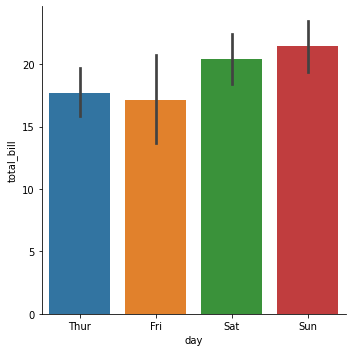

In [76]:
# Factor plots... just use the specific plot?
sb.factorplot(x='day',y='total_bill',data=tips,kind='bar')

## Matrix Plots

In [77]:
flights = sb.load_dataset('flights')

In [78]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


<AxesSubplot:>

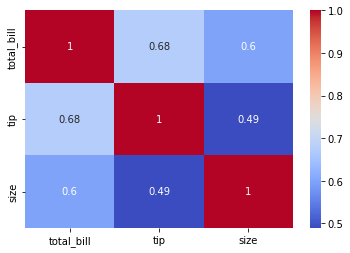

In [85]:
# Heatmaps only work if the data are in a matrix
tc = tips.corr()
sb.heatmap(tc,annot=True,cmap='coolwarm')

In [87]:
# Let's work with flights
flight_matrix = flights.pivot_table(index='month',columns='year',values='passengers')

<AxesSubplot:xlabel='year', ylabel='month'>

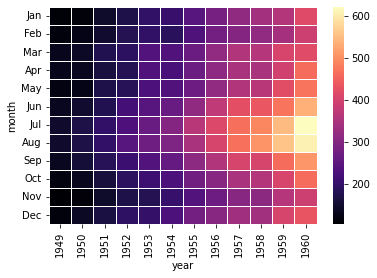

In [90]:
# heatmap it!
sb.heatmap(flight_matrix,annot=False,cmap='magma',linewidth=1,linecolor='w')

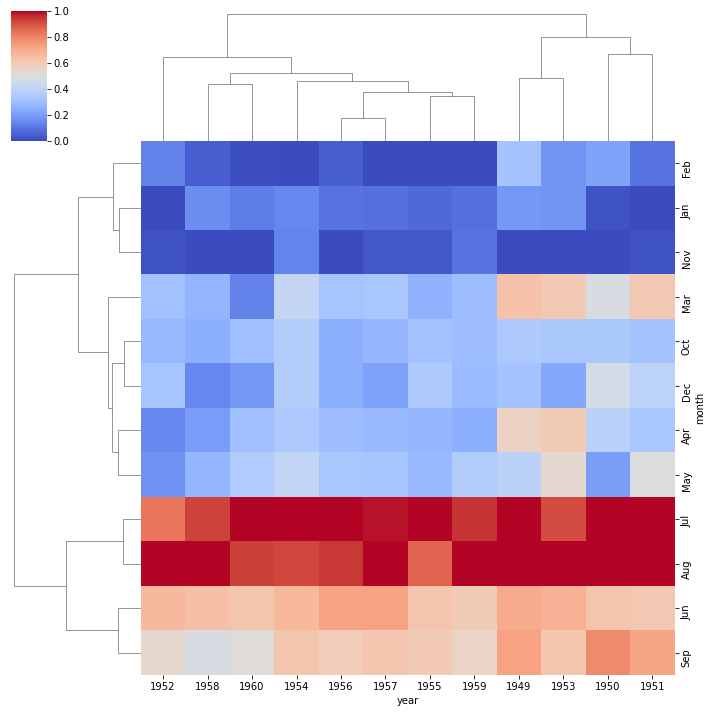

In [94]:
# Clustermap tries to cluster columns and rows together based on their similarity
sb.clustermap(flight_matrix,cmap='coolwarm',standard_scale=1)

## Grids

In [95]:
iris = sb.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


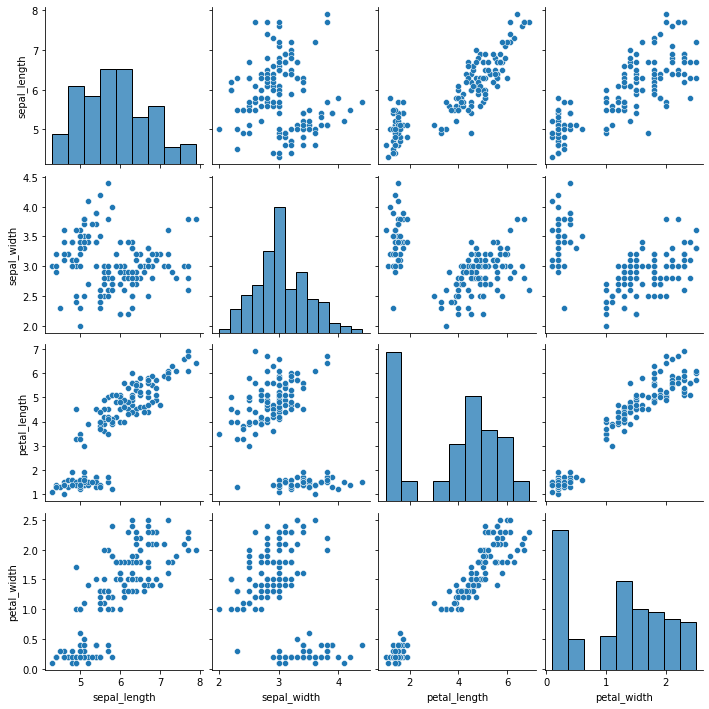

In [96]:
# Pairplot is basic and automatic
sb.pairplot(iris)

/home/bknorris/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/bknorris/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/bknorris/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

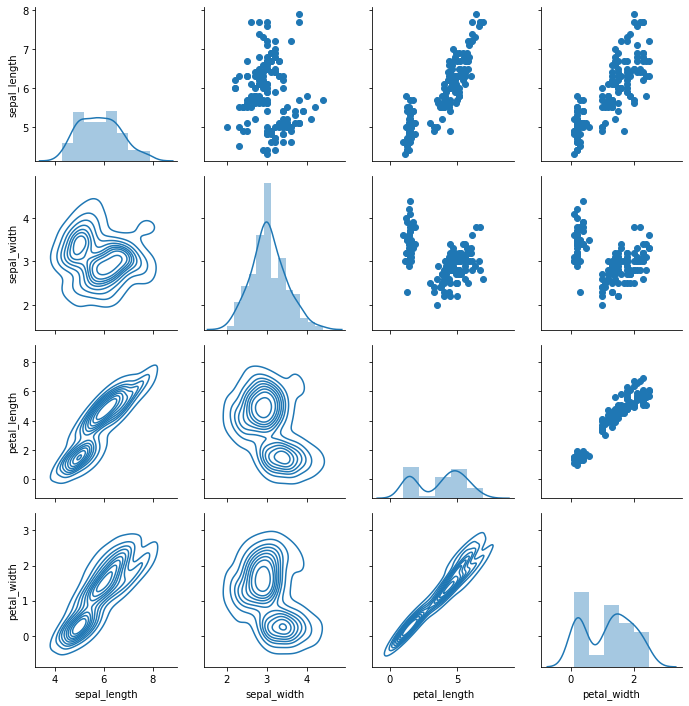

In [105]:
# PairGrid allows for more complicated visualizations within a pairplot framework.
pg = sb.PairGrid(iris)
pg.map_diag(sb.distplot)
pg.map_upper(plt.scatter)
pg.map_lower(sb.kdeplot)

In [107]:
# FacetGrid
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


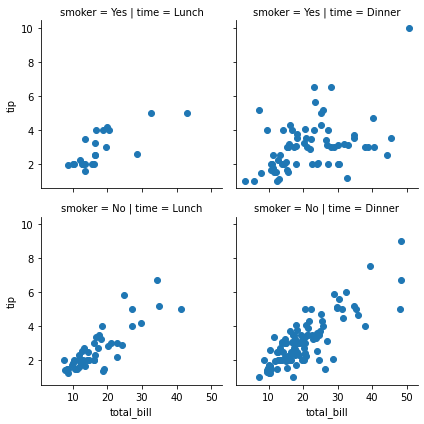

In [111]:
fg = sb.FacetGrid(data=tips,col='time',row='smoker')
# map plot types
fg.map(plt.scatter,'total_bill','tip')

## Linear Regression Plots

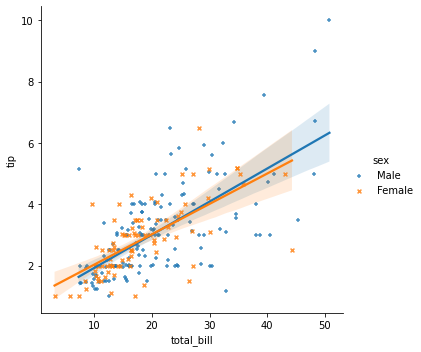

In [119]:
sb.lmplot(x='total_bill',y='tip',data=tips,hue='sex',markers=['+','x'],
         scatter_kws={'s':15})

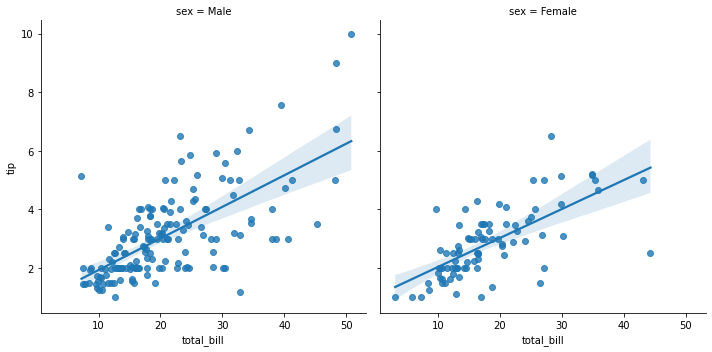

In [120]:
# add more plots... separate by column
sb.lmplot(x='total_bill',y='tip',data=tips,col='sex')

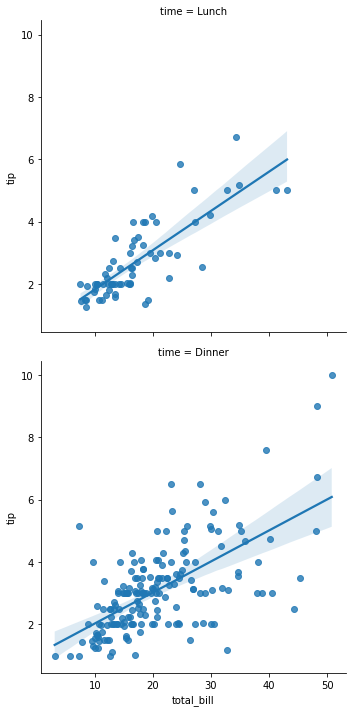

In [121]:
sb.lmplot(x='total_bill',y='tip',data=tips,row='time')

/home/bknorris/.local/lib/python3.8/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


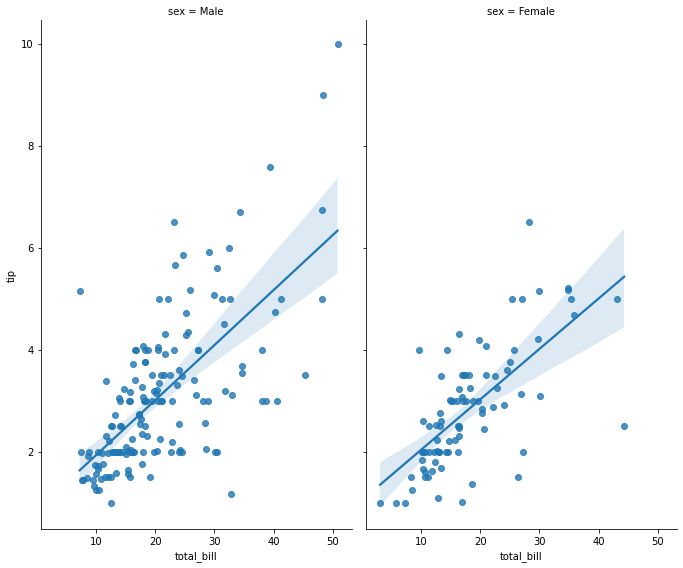

In [122]:
# adjust aspect ratio
sb.lmplot(x='total_bill',y='tip',data=tips,col='sex',aspect=0.6,size=8)

## Plot size, style, and color

<AxesSubplot:xlabel='sex', ylabel='count'>

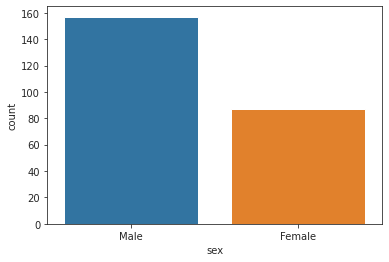

In [127]:
sb.set_style('ticks') # set the overall style of plots
sb.despine()
sb.countplot(x='sex',data=tips)

<AxesSubplot:xlabel='sex', ylabel='count'>

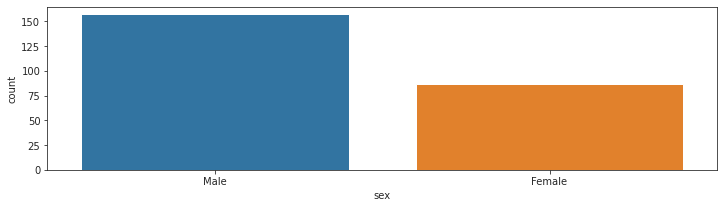

In [129]:
# More examples. Use matplotlib to change figure size
plt.figure(figsize=(12,3))
sb.countplot(x='sex',data=tips)

### Palettes and colors

Check out the seaborn documentation for color palettes: https://seaborn.pydata.org/tutorial/color_palettes.html
